In [394]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import clock, monotonic

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)
%matplotlib inline

colors = [cv2.COLORMAP_AUTUMN, 
          cv2.COLORMAP_COOL, 
          cv2.COLORMAP_HOT, 
          cv2.COLORMAP_OCEAN, 
          cv2.COLORMAP_SPRING, 
          cv2.COLORMAP_SUMMER,
          cv2.COLORMAP_WINTER]
face_dim = (200,200)
frame_size = (720, 1280, 3)

(720, 1280, 3)


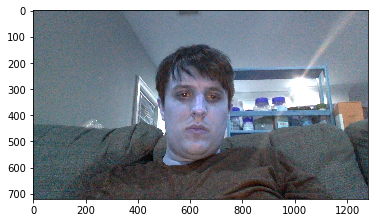

In [422]:
_ret, img = cam.read()
plt.imshow(img)
print(img.shape)

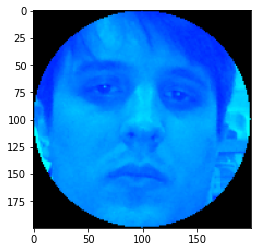

In [434]:
def get_face(color):
    _ret, img = cam.read()
    #img = cv2.flip(img,1)
    img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) == 0:
        return None
    (x, y, w, h) = faces[0]
    gray_face = gray[y:y+h, x:x+w]
    mask = np.zeros(gray_face.shape + (3,), np.uint8)
    cv2.circle(mask, (w//2, h//2), max(h//2,w//2), (255, 255, 255), -1)
    #gray_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2GRAY)
    color_face = cv2.applyColorMap(gray_face, color)
    face = color_face & mask
    face = cv2.resize(face, face_dim, interpolation = cv2.INTER_AREA)
    return face

face = get_face(cv2.COLORMAP_AUTUMN)
_ret, img = cam.read()
img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4), interpolation = cv2.INTER_AREA)
plt.imshow(face)

In [411]:
def get_face(color):
    _ret, img = cam.read()
    img = cv2.flip(img,1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) == 0:
        return None
    (x, y, w, h) = faces[0]
    img_face = img[y:y+h, x:x+w]
    mask = np.zeros_like(img_face)
    cv2.circle(mask, (w//2, h//2), max(h//2,w//2), (255, 255, 255), -1)
    gray_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2GRAY)
    color_face = cv2.applyColorMap(gray_face, colors[3])
    face = color_face & mask
    face = cv2.resize(face, face_dim, interpolation = cv2.INTER_AREA)
    return face

In [407]:
def bounce(framex, framey, imx, imy, imcenter):
    top_left = imcenter[0] - imx//2, imcenter[1] - imy//2
    bot_right = imcenter[0] + imx//2, imcenter[1] + imy/2
    dx, dy = 1, 1
    if top_left[0] <= 0: # left wall rebound
        dx = -1
    elif bot_right[0] > framex: #right wall rebound
        dx = -1
    if top_left[1] <= 0:
        dy = -1
    elif bot_right[1] > framey:
        dy = -1
    return dx, dy

In [408]:
prev = monotonic()
pos = (frame_size[1]//2,frame_size[0]//2)
unit_vel = (np.sqrt(2)/2, -np.sqrt(2)/2)
speed = 100
color_i = 0 
face = get_face(colors[color_i])

(696, 296)
(696, 296)


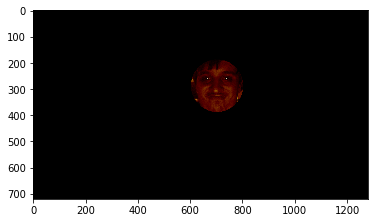

In [421]:
frame = np.zeros(frame_size, np.uint8)
now = monotonic()
dt = min(.1, now - prev)
prev = now
print(pos)
new_pos = (int(pos[0] + unit_vel[0] * speed * dt), int(pos[1] + unit_vel[1] * speed * dt))
print(pos)
dx,dy = bounce(frame_size[1], frame_size[0], face_dim[1], face_dim[0], new_pos)
if dx < 0 or dy < 0:
    color_i = (color_i + 1) % len(colors)
    unit_vel = (unit_vel[0] * dx, unit_vel[1] * dy)
    new_pos = (int(pos[0] + unit_vel[0] * speed * dt), int(pos[1] + unit_vel[1] * speed * dt))
pos = new_pos
next_face = get_face(colors[color_i])
face = next_face if next_face is not None else face
frame[pos[1] - face_dim[1]//2: pos[1] + face_dim[1]//2, pos[0] - face_dim[0]//2: pos[0] + face_dim[0]//2, :] = face
plt.imshow(frame)

In [419]:
face.shape

(200, 200, 3)